In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocessing
feature extraction
Scaling

In [56]:
df_train = pd.read_csv("ALS_TrainingData_2223.csv")
test = pd.read_csv("ALS_TestingData_78.csv")
df=df_train.drop(["ID","SubjectID"],axis=1) ## droping because its ID's


for i in test.columns:
    if i in df.columns:
        continue
    else:
        test.drop(i,axis=1,inplace=True,)
print(df.shape,test.shape)

(2223, 99) (78, 99)


# Scaling

In [57]:

Scaler = StandardScaler()
Scaler.fit(df)
df_scaled1 = Scaler.transform(df)
df1=pd.DataFrame(df_scaled1,columns = df.columns)
m=df1

df1


Scaler = StandardScaler()
Scaler.fit(test)
df_scaled2 = Scaler.transform(test)
df2=pd.DataFrame(df_scaled2,columns = test.columns)
df2


,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.945850,0.244852,0.596349,1.034793,0.587818,-1.458910,0.526079,-1.851243,-1.341512,0.024737,...,-1.540062,-0.230618,0.085914,0.637377,-1.415480,-0.851721,-0.175258,-0.860781,-0.338062,0.957082
1,-0.193890,-2.060136,-2.015032,-1.495422,-0.273925,-0.815078,0.361283,0.162818,-0.074453,0.765499,...,0.156617,-1.258514,0.421791,0.159344,-0.213221,-0.851721,1.509194,-0.860781,-1.217022,-1.238577
2,0.035316,0.244852,0.269926,0.022707,-0.526281,0.640669,-2.440247,-1.291782,-1.341512,-0.754729,...,-0.861391,-0.744566,-0.887453,-2.708854,-1.415480,-0.851721,-1.803831,0.631239,0.980379,0.957082
3,1.588363,1.561988,0.106715,0.528750,5.702402,0.685649,0.690875,0.274710,0.664665,0.373247,...,-0.182719,0.283330,3.710817,1.115411,0.788661,1.423424,0.156589,0.631239,1.419859,0.957082
4,0.859045,-0.084432,-0.056496,-0.736357,0.343078,1.279778,1.185263,1.729309,2.354077,-1.934531,...,2.531967,1.311227,-0.138413,0.637377,1.389791,2.333482,-1.803831,-1.606791,-1.217022,-1.238577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.055383,-1.072284,-0.872553,-0.483336,-0.444773,0.220581,0.526079,0.722279,0.875841,-0.447501,...,0.156617,-0.744566,0.404247,0.637377,1.389791,1.423424,-0.709051,-1.606791,-1.217022,-1.238577
74,-0.796017,0.574136,0.596349,0.528750,-0.852880,0.776565,-0.627492,-0.284751,-0.391218,-1.010305,...,-0.861391,-0.230618,-1.234616,0.159344,-1.014727,-0.851721,-0.442966,0.631239,-0.338062,-0.140747
75,0.373619,0.574136,0.596349,0.275729,-0.556463,0.767449,0.526079,0.274710,-0.496806,0.172293,...,1.174624,-0.744566,-0.367130,0.637377,0.187532,-0.396692,0.219322,0.631239,0.540899,0.957082
76,0.476159,-1.072284,-1.035764,-0.230314,-0.668229,0.599139,1.185263,1.281740,1.720547,-1.126287,...,-0.182719,0.283330,-0.593585,0.637377,0.588285,0.968395,-0.316218,-0.860781,-0.338062,-0.140747


# Visualization

C:\Users\Bharath\AppData\Local\Temp/ipykernel_8416/3485657477.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


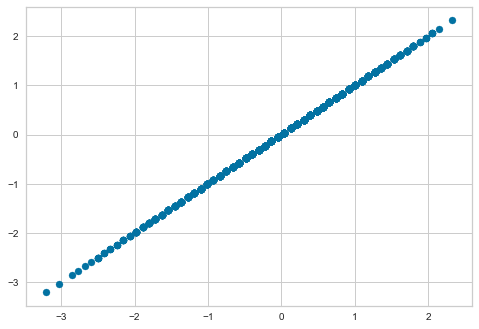

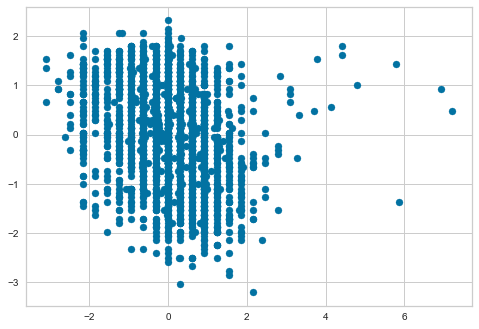

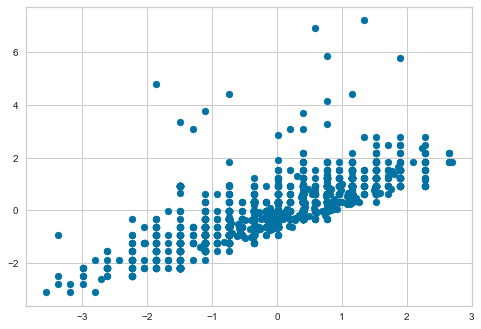

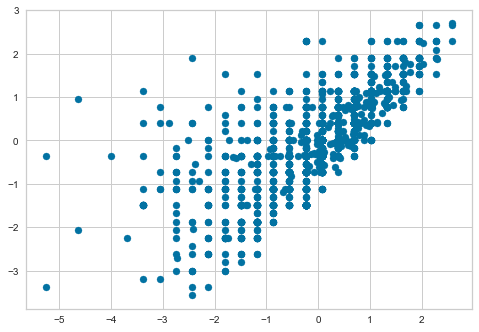

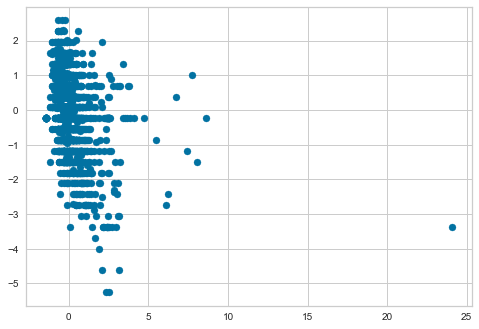

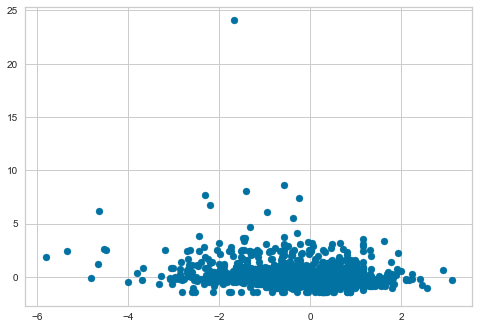

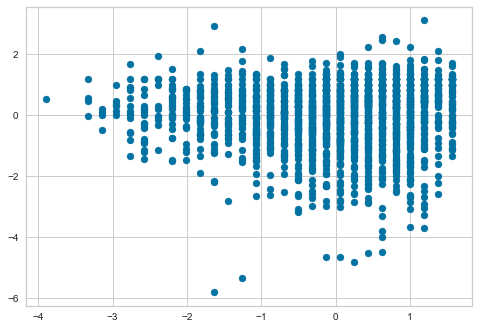

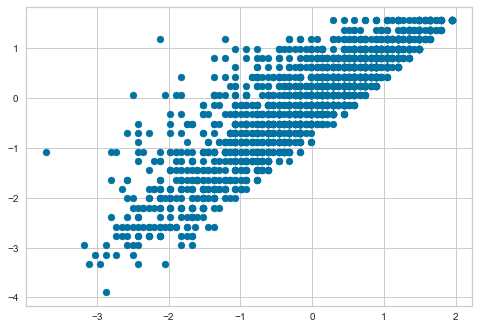

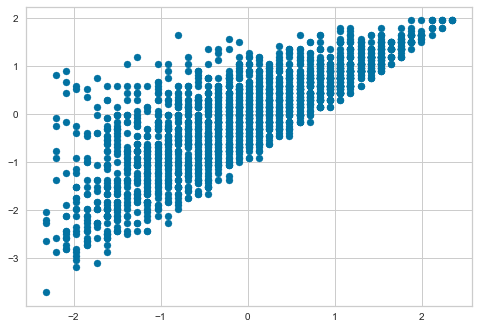

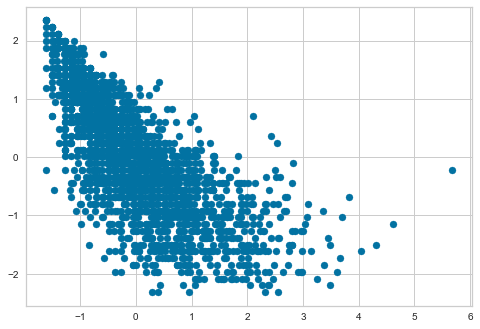

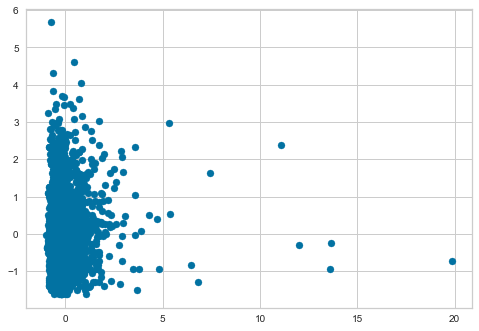

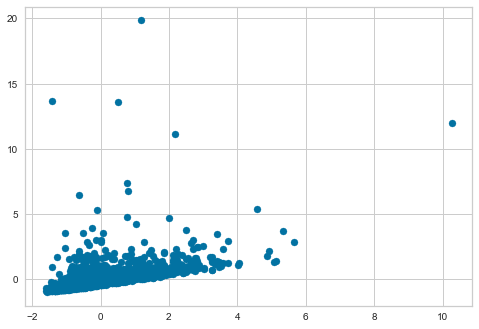

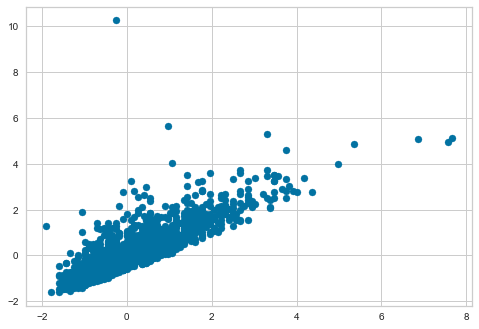

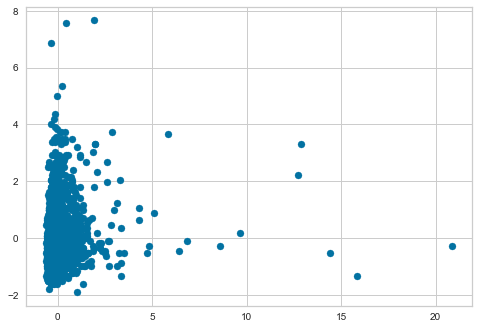

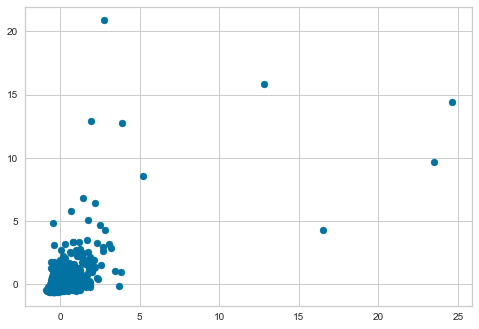

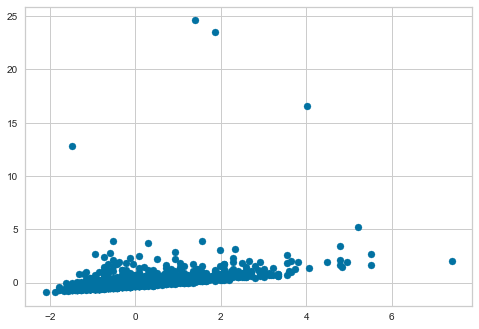

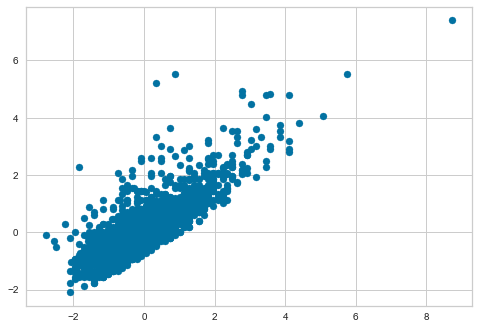

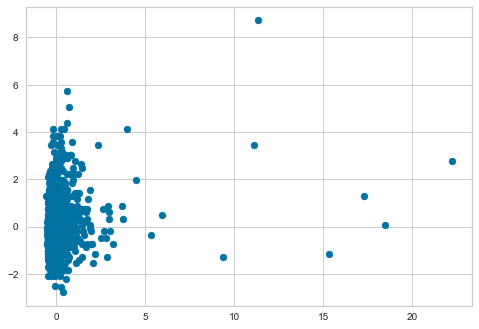

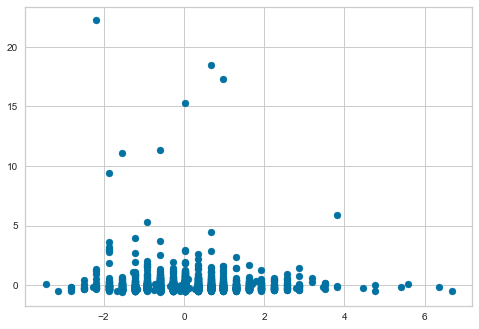

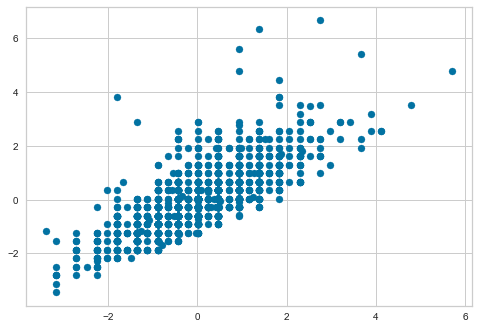

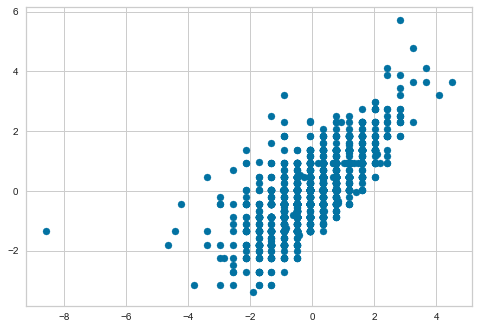

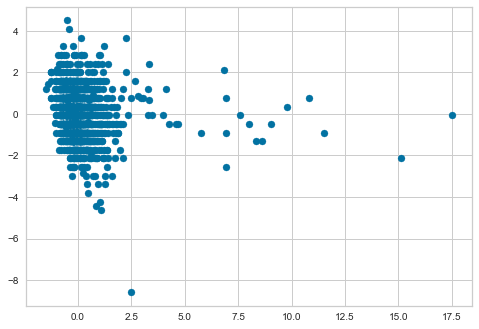

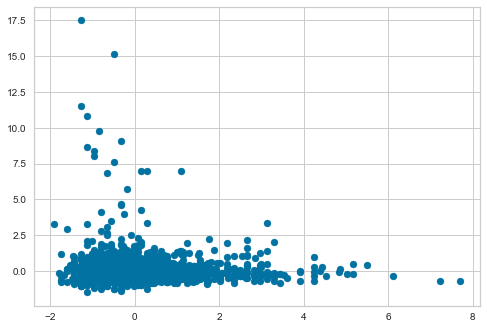

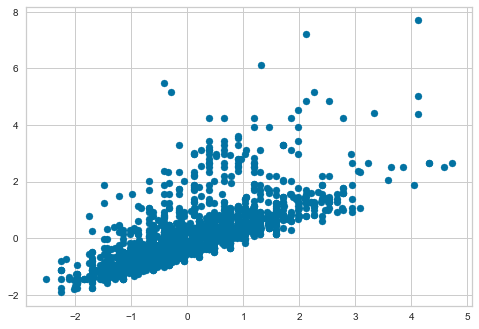

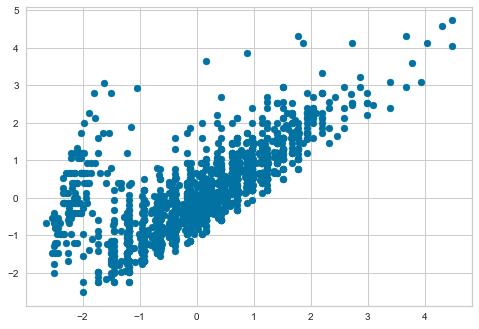

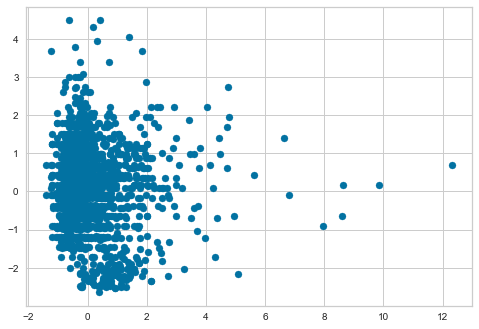

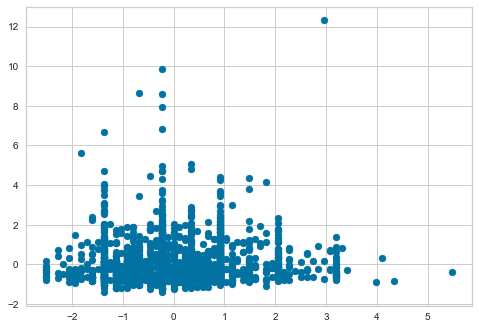

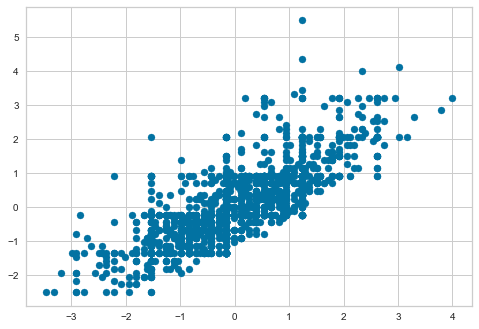

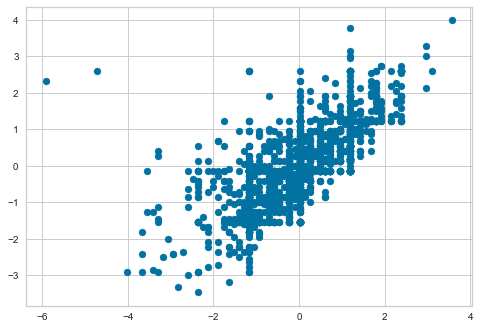

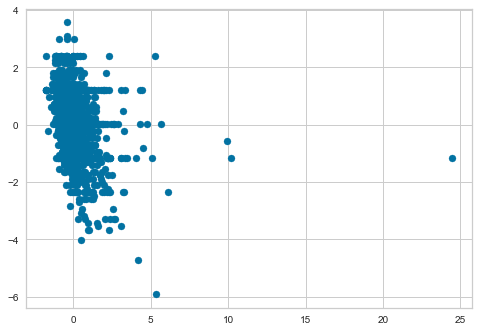

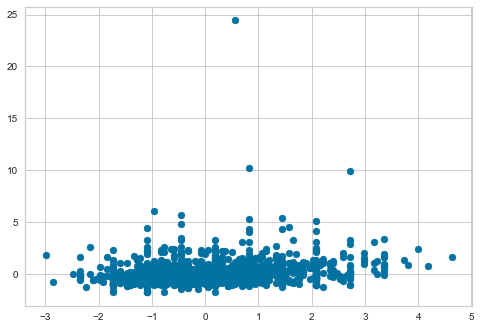

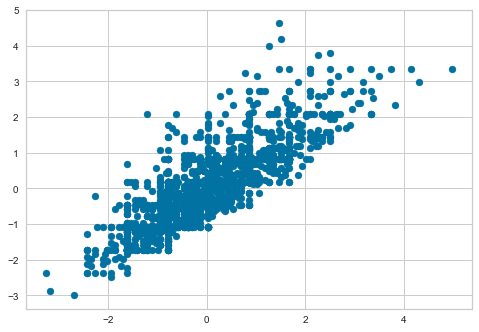

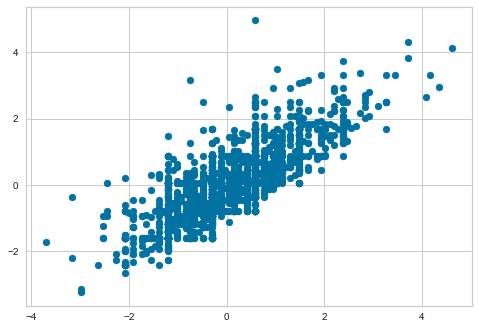

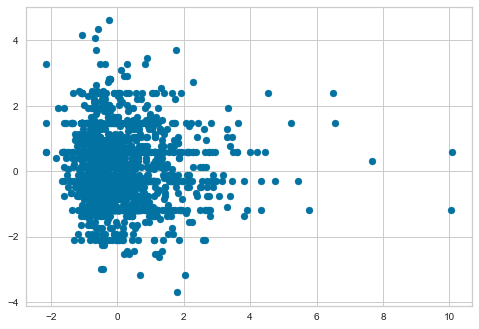

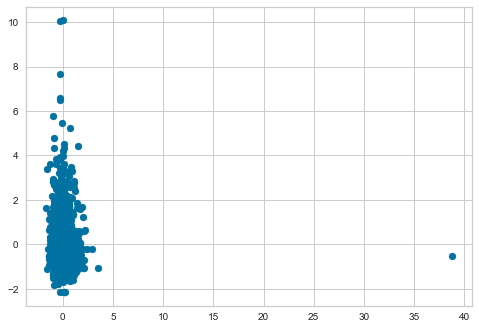

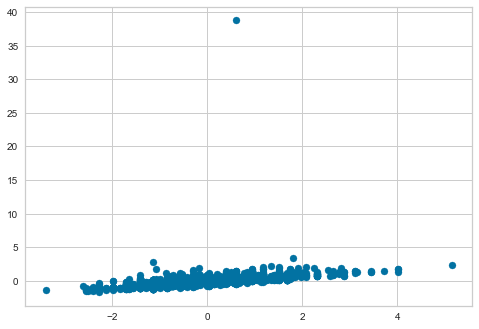

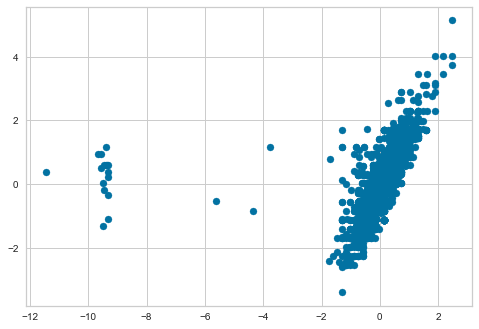

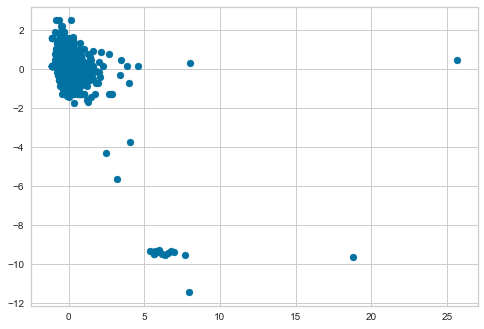

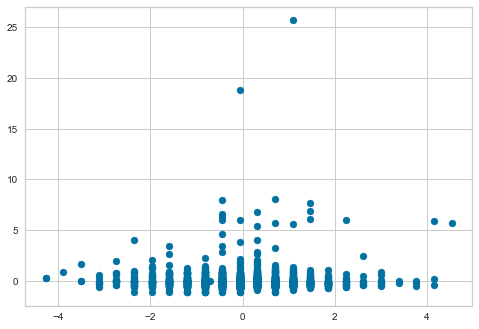

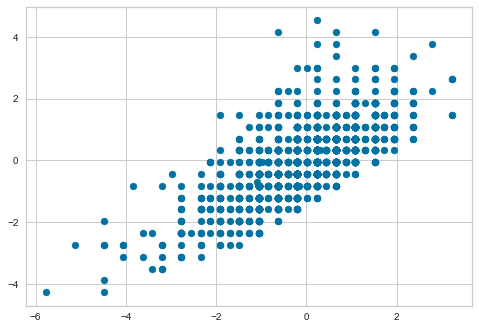

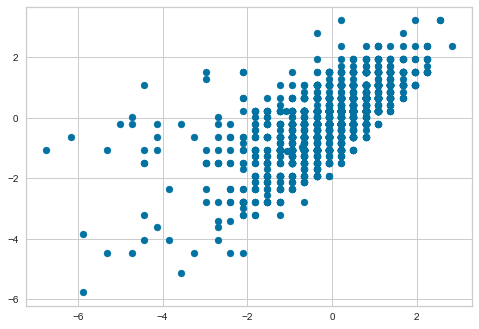

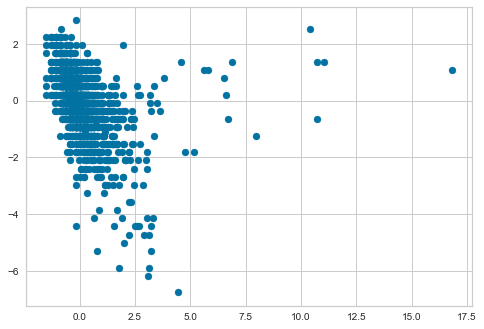

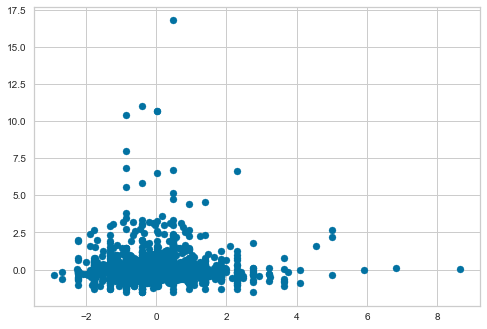

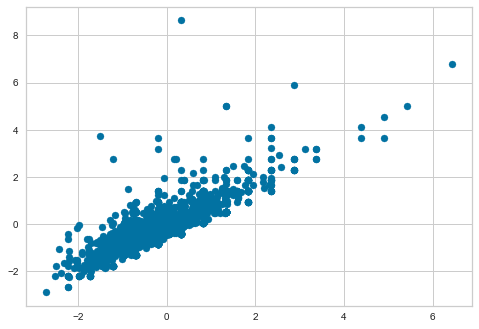

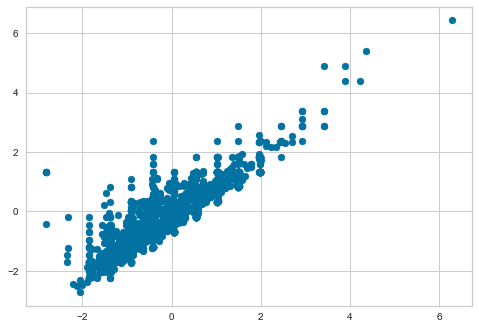

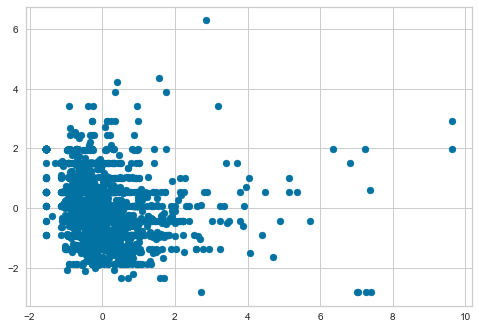

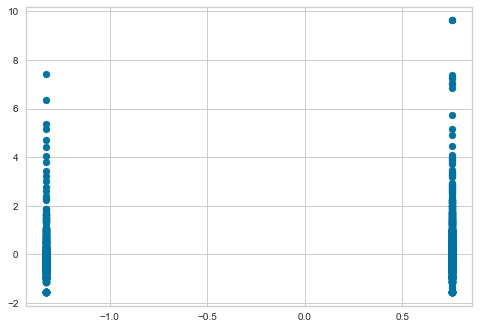

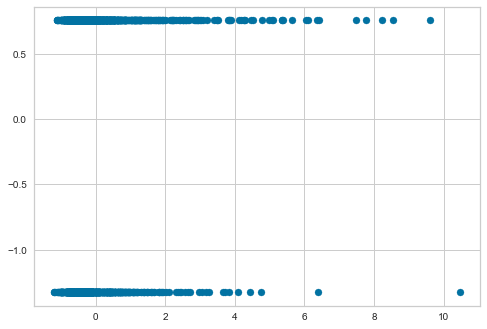

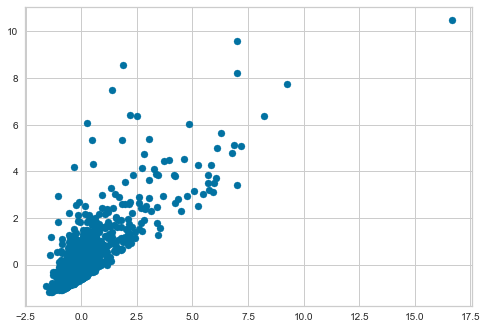

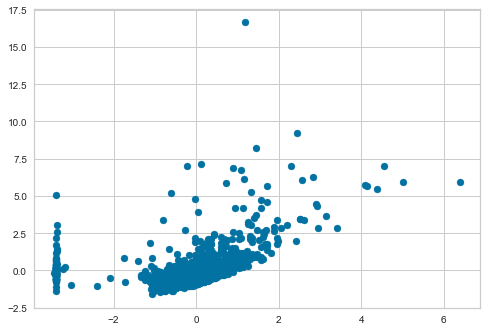

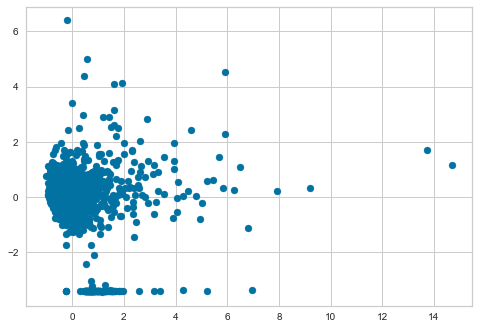

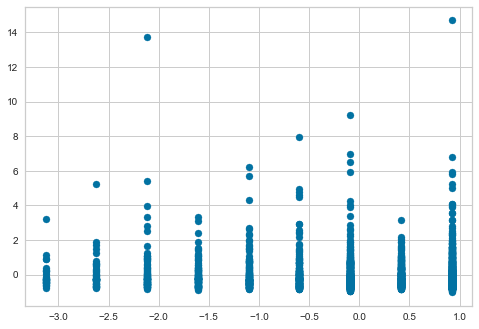

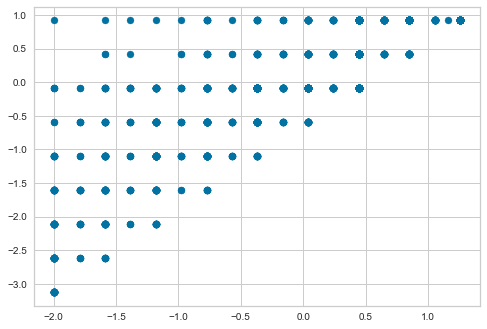

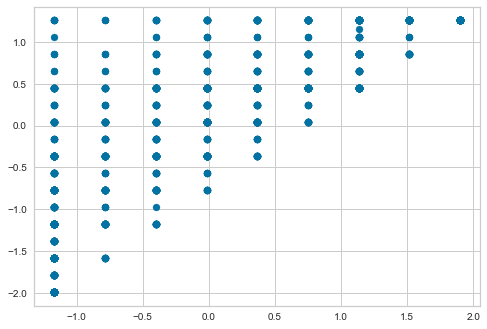

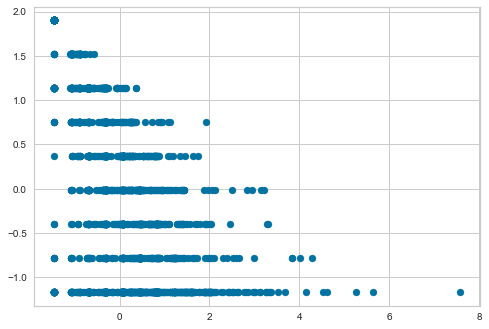

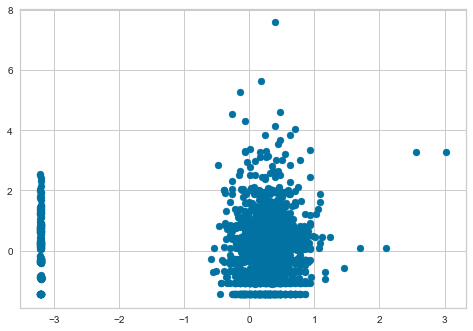

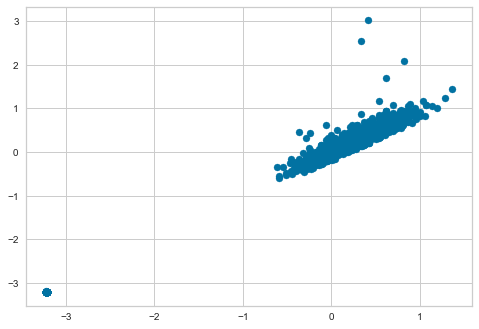

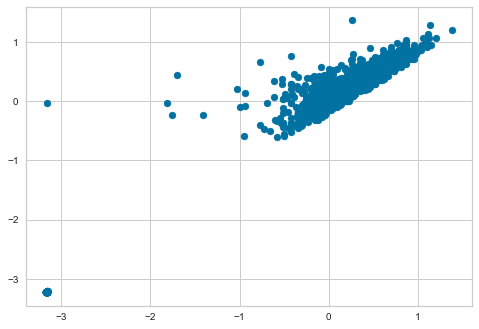

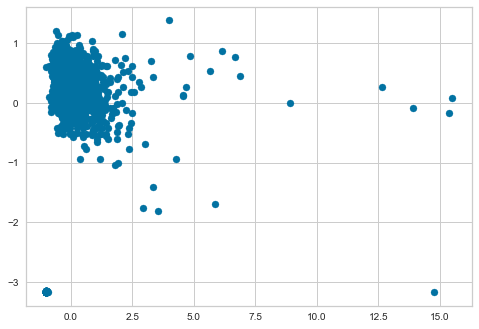

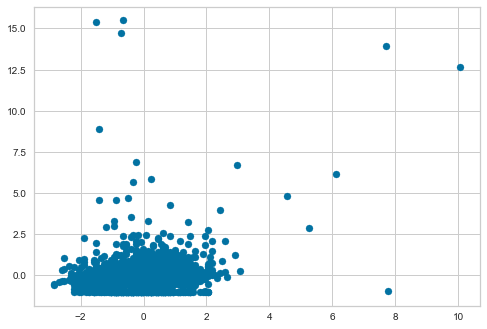

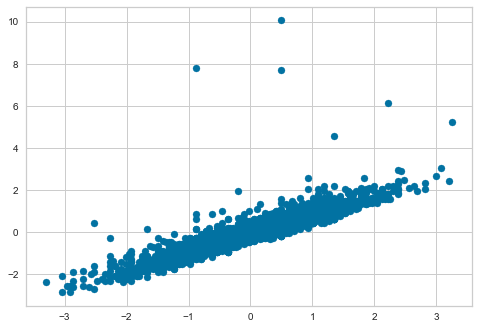

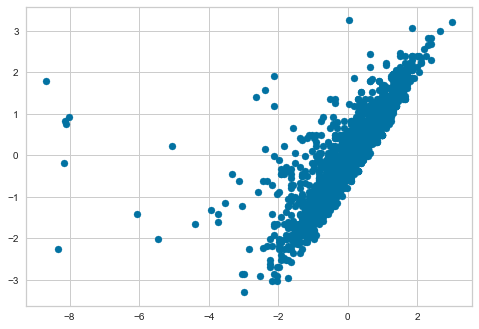

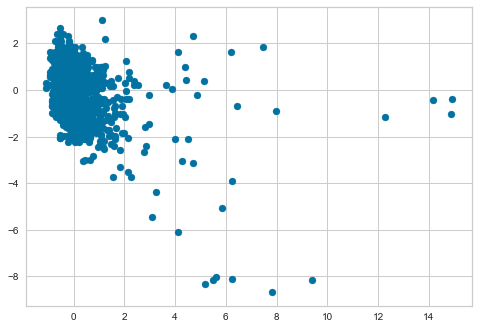

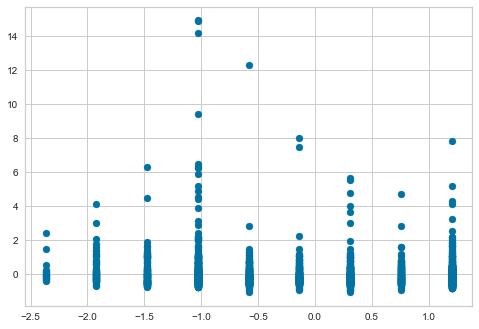

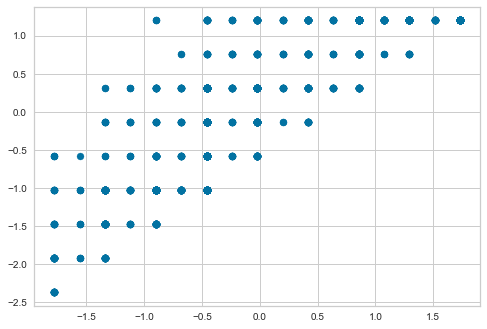

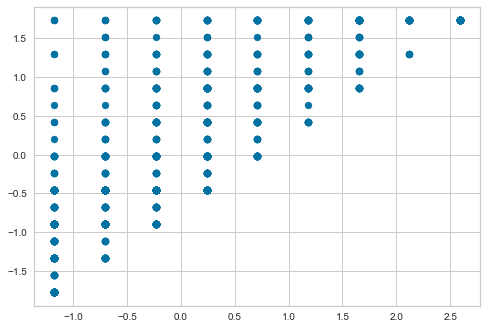

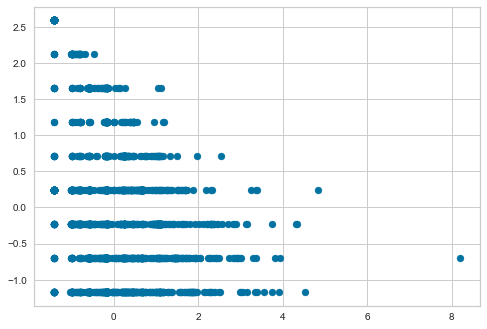

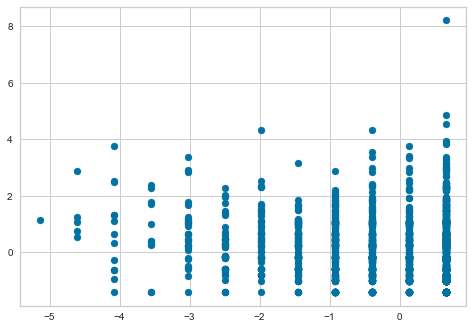

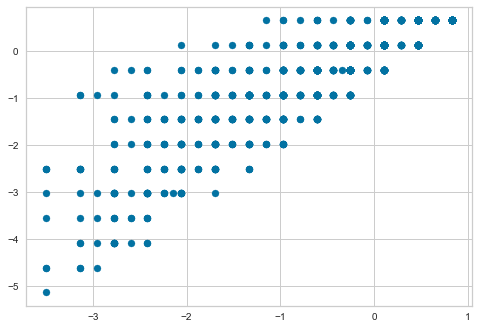

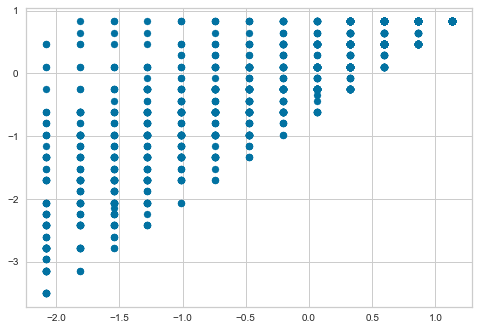

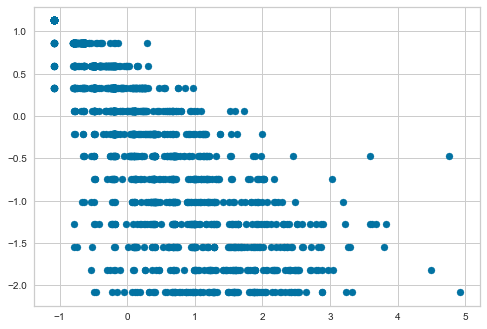

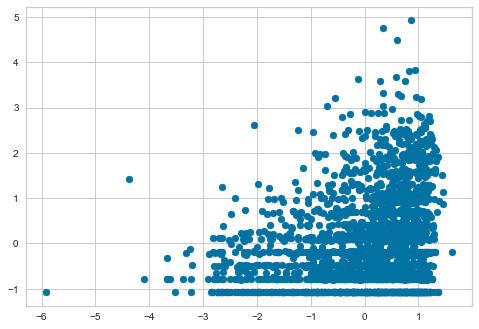

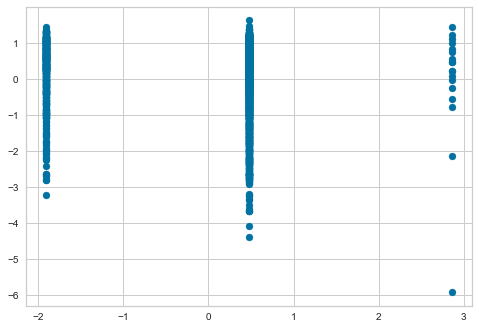

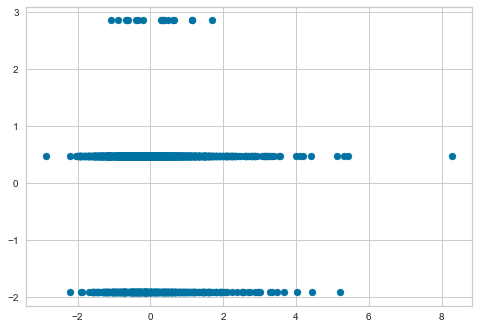

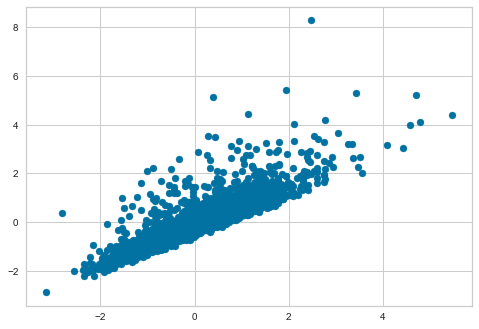

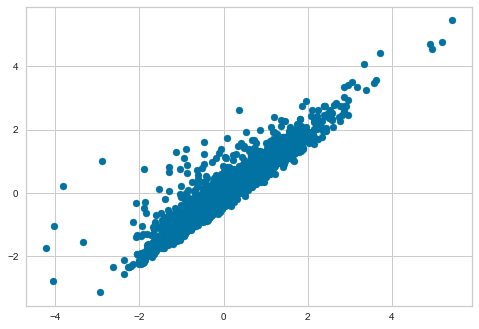

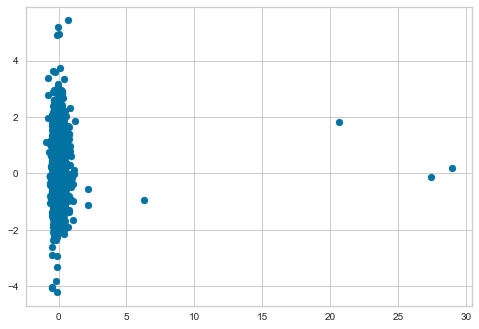

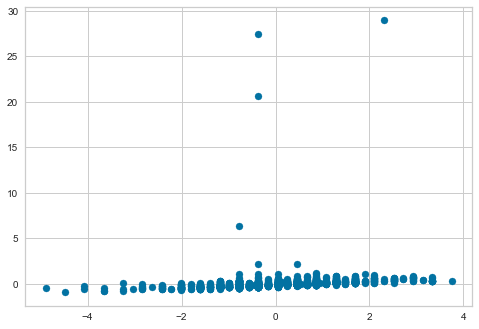

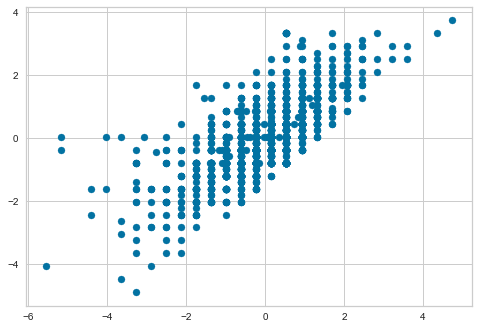

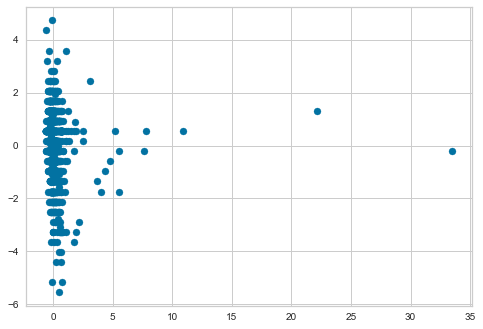

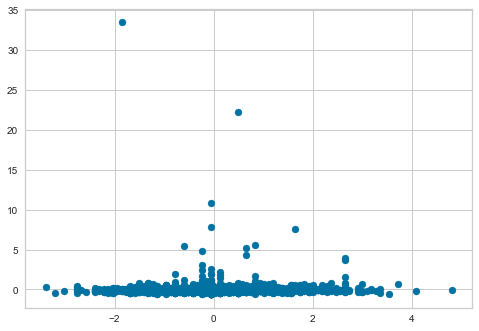

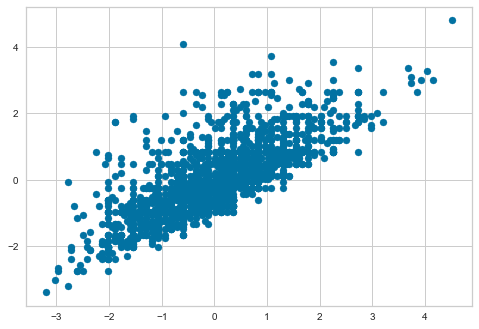

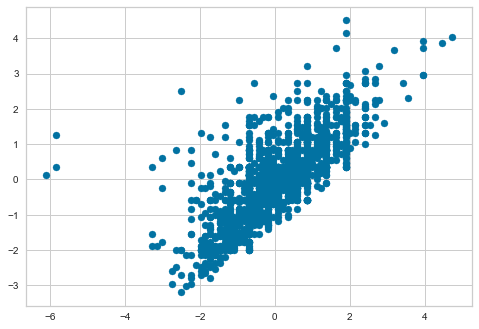

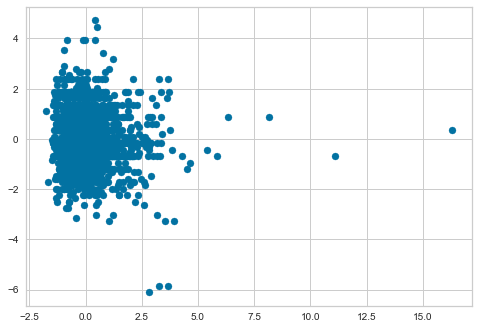

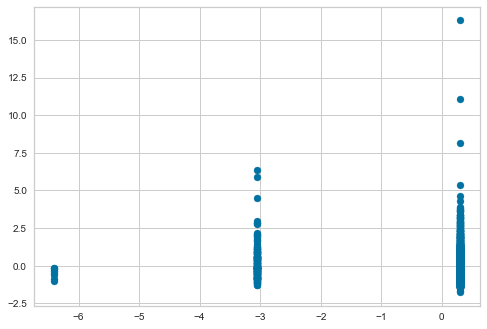

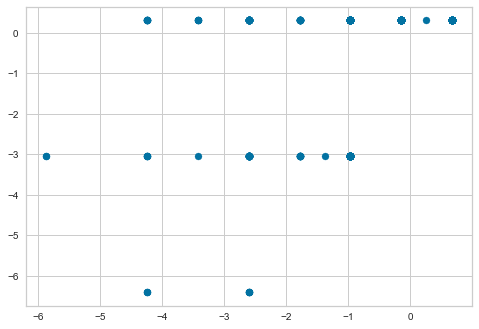

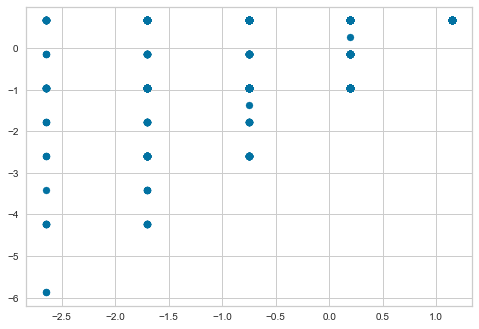

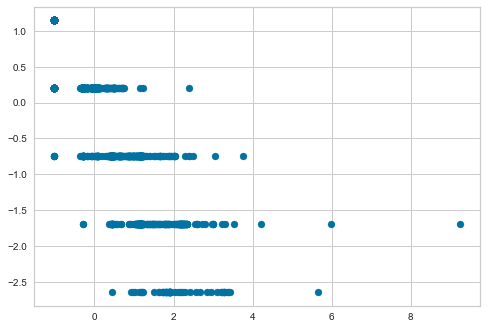

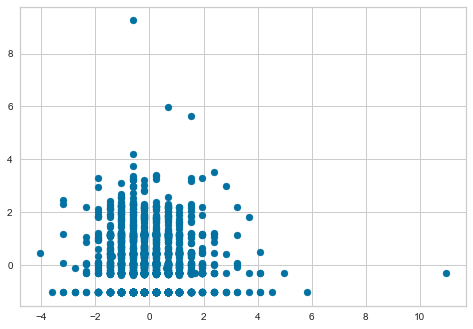

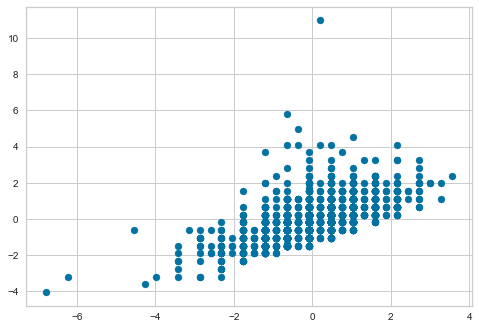

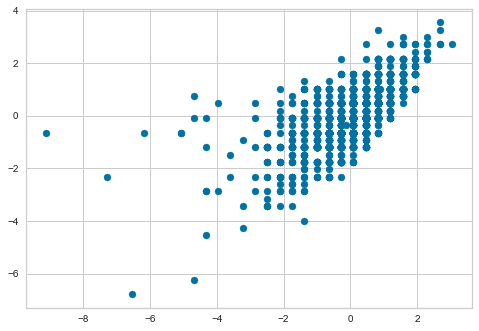

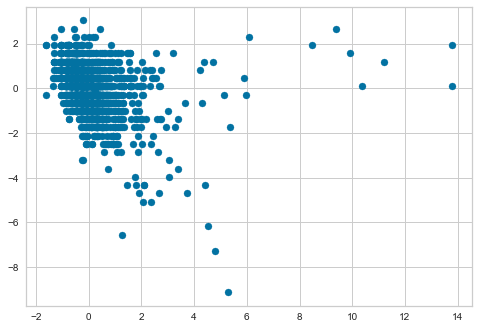

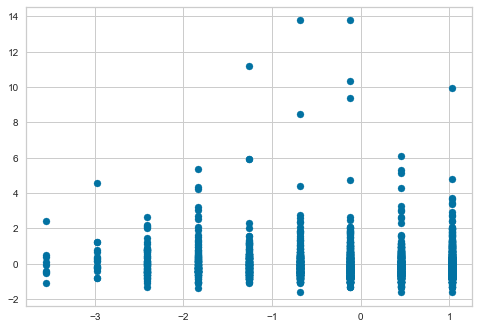

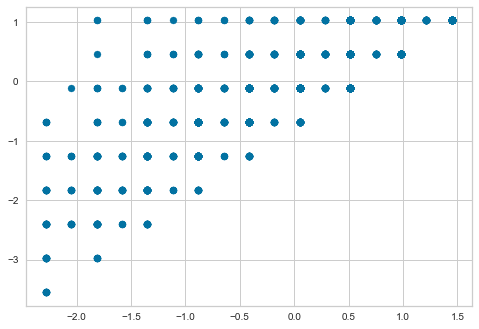

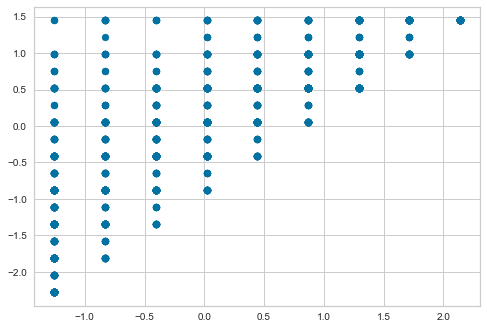

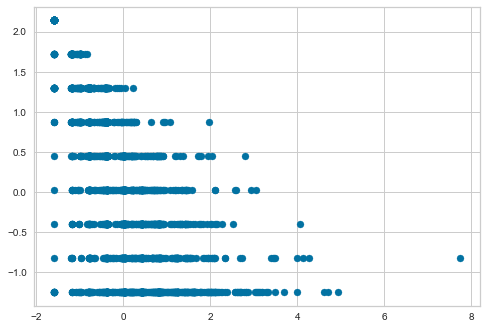

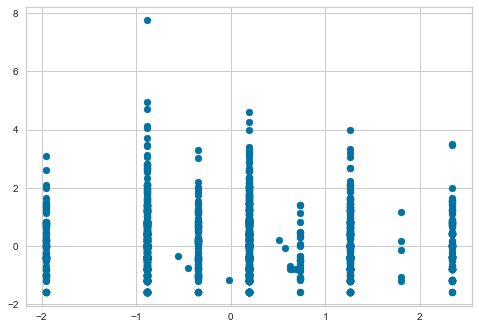

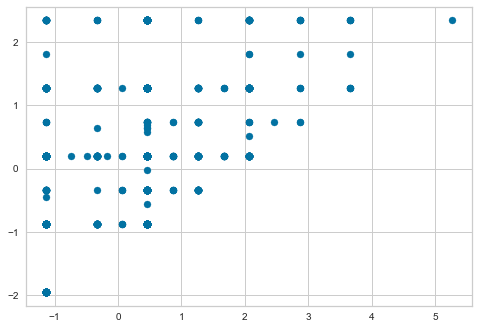

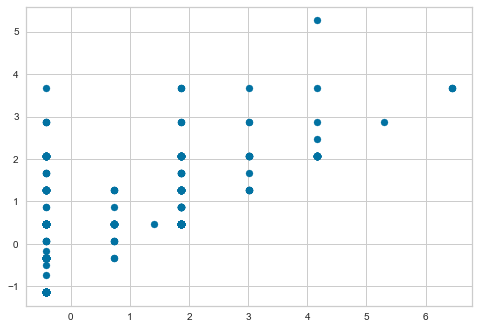

In [58]:
colors = np.array(["red","green"])
categories = np.array([0, 2,])
colormap = np.array(['r', 'g'])
k= "Age_mean"
for i in df1.columns:
    
    fig,ax = plt.subplots()
    ax.scatter(df1["{}".format(i)],df1["{}".format(k)])
    k=i

# Correlation of features with ALSFRS_slope

In [59]:
arr=[]
for i in df1.columns:
    arr.append(df1["ALSFRS_slope"].corr(df1["{}".format(i)]))
Corr = pd.DataFrame(arr,columns=["ALSFRS_slope"]).transpose()
Corr.columns = df1.columns
Corr

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
ALSFRS_slope,-0.015301,0.037438,0.059234,0.112154,-0.226123,1.0,0.039156,0.24725,0.60181,-0.819305,...,0.011087,0.029528,-0.154524,0.031517,0.184289,0.48853,-0.686407,-0.037779,-0.064897,-0.032226


[220076.99999999997, 203345.13122708848, 195965.40377762614, 190073.83843580552, 185565.9897916502, 180884.3236227567, 177044.78473628862, 173904.1690019862, 170595.02983719204, 168086.61537200757, 165130.88015238105]


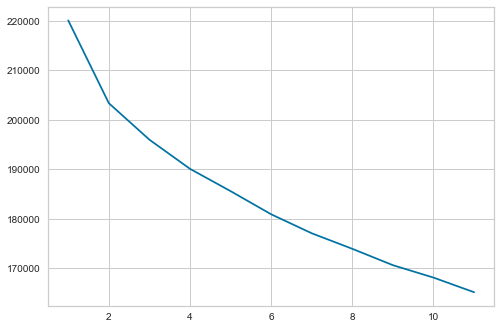

In [60]:
clu = range(1,12)
arr =[]
for i in (clu):
    KM = KMeans(n_clusters=i)
    sse = KM.fit(df1)
    arr.append(sse.inertia_)
print(arr)
plt.plot(clu,arr)

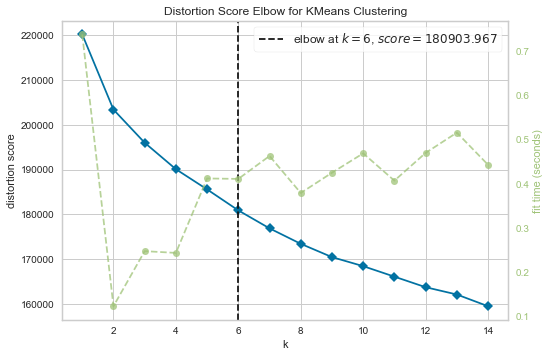

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
model =KMeans()
vis = KElbowVisualizer(model,k=(1,15)).fit(df1)
vis.show()

# KMeans with n=5

In [62]:
K_5 = df1
C =KMeans(5)

fit=C.fit(K_5)
pred = C.predict(K_5)
K_5["Clusters"] = pred
K_5

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Clusters
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532,1
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151,3
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151,2
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151,3
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.785569,0.622562,0.813473,1.179597,-1.048020,...,-0.278144,-0.103934,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151,3
2219,0.566074,-0.003443,0.394641,0.386438,-0.491855,0.545755,-0.130304,-0.166601,-0.335275,-0.038819,...,1.563723,-0.638454,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151,3
2220,-0.662644,-0.312730,0.017880,0.073191,-0.174361,0.995908,-1.071386,-0.618943,0.014311,-0.934015,...,-0.646518,-0.202174,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151,4
2221,-1.540301,0.615129,0.017880,-0.553303,0.426393,-0.205092,0.434346,0.361131,0.130839,-0.174655,...,-0.278144,-0.846582,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151,4


# Predicting Test data

In [63]:
K_3_test = df2
n= fit.predict(K_3_test)
K_3_test["Clusters"] = n
K_3_test


,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Clusters
0,0.945850,0.244852,0.596349,1.034793,0.587818,-1.458910,0.526079,-1.851243,-1.341512,0.024737,...,-0.230618,0.085914,0.637377,-1.415480,-0.851721,-0.175258,-0.860781,-0.338062,0.957082,1
1,-0.193890,-2.060136,-2.015032,-1.495422,-0.273925,-0.815078,0.361283,0.162818,-0.074453,0.765499,...,-1.258514,0.421791,0.159344,-0.213221,-0.851721,1.509194,-0.860781,-1.217022,-1.238577,4
2,0.035316,0.244852,0.269926,0.022707,-0.526281,0.640669,-2.440247,-1.291782,-1.341512,-0.754729,...,-0.744566,-0.887453,-2.708854,-1.415480,-0.851721,-1.803831,0.631239,0.980379,0.957082,2
3,1.588363,1.561988,0.106715,0.528750,5.702402,0.685649,0.690875,0.274710,0.664665,0.373247,...,0.283330,3.710817,1.115411,0.788661,1.423424,0.156589,0.631239,1.419859,0.957082,1
4,0.859045,-0.084432,-0.056496,-0.736357,0.343078,1.279778,1.185263,1.729309,2.354077,-1.934531,...,1.311227,-0.138413,0.637377,1.389791,2.333482,-1.803831,-1.606791,-1.217022,-1.238577,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.055383,-1.072284,-0.872553,-0.483336,-0.444773,0.220581,0.526079,0.722279,0.875841,-0.447501,...,-0.744566,0.404247,0.637377,1.389791,1.423424,-0.709051,-1.606791,-1.217022,-1.238577,3
74,-0.796017,0.574136,0.596349,0.528750,-0.852880,0.776565,-0.627492,-0.284751,-0.391218,-1.010305,...,-0.230618,-1.234616,0.159344,-1.014727,-0.851721,-0.442966,0.631239,-0.338062,-0.140747,2
75,0.373619,0.574136,0.596349,0.275729,-0.556463,0.767449,0.526079,0.274710,-0.496806,0.172293,...,-0.744566,-0.367130,0.637377,0.187532,-0.396692,0.219322,0.631239,0.540899,0.957082,3
76,0.476159,-1.072284,-1.035764,-0.230314,-0.668229,0.599139,1.185263,1.281740,1.720547,-1.126287,...,0.283330,-0.593585,0.637377,0.588285,0.968395,-0.316218,-0.860781,-0.338062,-0.140747,3


# KMeans with n=4

In [64]:
K_4 = df1
C =KMeans(4)
fit=C.fit(K_4)
pred = C.predict(K_4)
K_4["Clusters"] = pred
K_4

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Clusters
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532,2
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151,0
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151,3
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151,0
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.785569,0.622562,0.813473,1.179597,-1.048020,...,-0.278144,-0.103934,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151,0
2219,0.566074,-0.003443,0.394641,0.386438,-0.491855,0.545755,-0.130304,-0.166601,-0.335275,-0.038819,...,1.563723,-0.638454,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151,0
2220,-0.662644,-0.312730,0.017880,0.073191,-0.174361,0.995908,-1.071386,-0.618943,0.014311,-0.934015,...,-0.646518,-0.202174,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151,3
2221,-1.540301,0.615129,0.017880,-0.553303,0.426393,-0.205092,0.434346,0.361131,0.130839,-0.174655,...,-0.278144,-0.846582,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151,0


In [65]:
K_4_test = df2
n= fit.predict(K_4_test)
K_4_test["Clusters"] = n
K_4_test

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Clusters
0,0.945850,0.244852,0.596349,1.034793,0.587818,-1.458910,0.526079,-1.851243,-1.341512,0.024737,...,-0.230618,0.085914,0.637377,-1.415480,-0.851721,-0.175258,-0.860781,-0.338062,0.957082,2
1,-0.193890,-2.060136,-2.015032,-1.495422,-0.273925,-0.815078,0.361283,0.162818,-0.074453,0.765499,...,-1.258514,0.421791,0.159344,-0.213221,-0.851721,1.509194,-0.860781,-1.217022,-1.238577,3
2,0.035316,0.244852,0.269926,0.022707,-0.526281,0.640669,-2.440247,-1.291782,-1.341512,-0.754729,...,-0.744566,-0.887453,-2.708854,-1.415480,-0.851721,-1.803831,0.631239,0.980379,0.957082,3
3,1.588363,1.561988,0.106715,0.528750,5.702402,0.685649,0.690875,0.274710,0.664665,0.373247,...,0.283330,3.710817,1.115411,0.788661,1.423424,0.156589,0.631239,1.419859,0.957082,2
4,0.859045,-0.084432,-0.056496,-0.736357,0.343078,1.279778,1.185263,1.729309,2.354077,-1.934531,...,1.311227,-0.138413,0.637377,1.389791,2.333482,-1.803831,-1.606791,-1.217022,-1.238577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.055383,-1.072284,-0.872553,-0.483336,-0.444773,0.220581,0.526079,0.722279,0.875841,-0.447501,...,-0.744566,0.404247,0.637377,1.389791,1.423424,-0.709051,-1.606791,-1.217022,-1.238577,0
74,-0.796017,0.574136,0.596349,0.528750,-0.852880,0.776565,-0.627492,-0.284751,-0.391218,-1.010305,...,-0.230618,-1.234616,0.159344,-1.014727,-0.851721,-0.442966,0.631239,-0.338062,-0.140747,3
75,0.373619,0.574136,0.596349,0.275729,-0.556463,0.767449,0.526079,0.274710,-0.496806,0.172293,...,-0.744566,-0.367130,0.637377,0.187532,-0.396692,0.219322,0.631239,0.540899,0.957082,0
76,0.476159,-1.072284,-1.035764,-0.230314,-0.668229,0.599139,1.185263,1.281740,1.720547,-1.126287,...,0.283330,-0.593585,0.637377,0.588285,0.968395,-0.316218,-0.860781,-0.338062,-0.140747,0


# Performing PCA for dimensionality reduction and Cluster visualization

In [66]:
pca=PCA(2)
b=pca.fit_transform(m)
PCA_df = pd.DataFrame({"Standard Deviation:":np.sqrt(pca.explained_variance_),"varience ratio":pca.explained_variance_ratio_,"cumulative":np.cumsum(pca.explained_variance_ratio_)})
pca_d=PCA_df.transpose()
pca_d.columns = ["pc{}".format(i) for i in range(1,len(pca_d.columns)+1)]
pca_d

,pc1,pc2
Standard Deviation:,3.497147,2.527541
varience ratio,0.121369,0.063398
cumulative,0.121369,0.184767


In [67]:
#Kmeans with k=5

b1=pd.DataFrame(data=b,columns=["pca1","pca2"])
b2=b1
pca_km =KMeans(n_clusters=5)
pca_fit=pca_km.fit_predict(b1)
pca_fit
b1["clusters"] = pca_fit
b1


,pca1,pca2,clusters
0,-1.294726,-2.509971,1
1,-1.856522,-4.971002,2
2,2.153826,-0.173309,1
3,-2.178922,2.245415,0
4,0.831071,0.400490,3
...,...,...,...
2218,-4.623340,1.348428,0
2219,-0.760036,-1.860944,1
2220,0.156661,4.446676,3
2221,-0.731228,3.280424,0


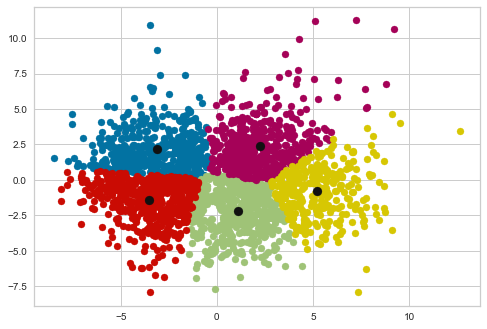

In [68]:
cluster0 =b1[b1["clusters"]==0]
cluster1 = b1[b1["clusters"]==1]
cluster2 = b1[b1["clusters"]==2]
cluster3 = b1[b1["clusters"]==3]
cluster4 = b1[b1["clusters"]==4]
plt.scatter(cluster0["pca1"],cluster0["pca2"])
plt.scatter(cluster1["pca1"],cluster1["pca2"])
plt.scatter(cluster2["pca1"],cluster2["pca2"])
plt.scatter(cluster3["pca1"],cluster3["pca2"])
plt.scatter(cluster4["pca1"],cluster4["pca2"])
centroids_4 = pca_km.cluster_centers_
labels = np.unique(b1["clusters"])
plt.scatter(centroids_4[:,0] , centroids_4[:,1] , s = 80, color = 'k')

In [69]:
#Kmeans with k=4
pca_km_4 =KMeans(n_clusters=4)
pca_fit_4=pca_km_4.fit_predict(b2)
pca_fit_4
b2["clusters"] = pca_fit_4
b2


,pca1,pca2,clusters
0,-1.294726,-2.509971,1
1,-1.856522,-4.971002,1
2,2.153826,-0.173309,1
3,-2.178922,2.245415,3
4,0.831071,0.400490,0
...,...,...,...
2218,-4.623340,1.348428,3
2219,-0.760036,-1.860944,1
2220,0.156661,4.446676,0
2221,-0.731228,3.280424,3


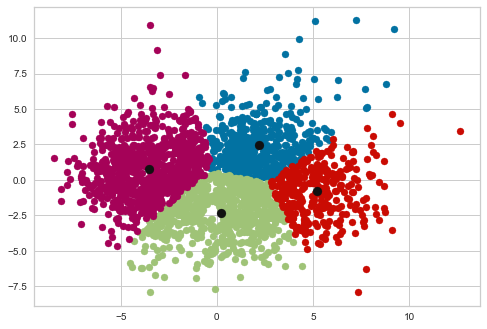

In [70]:
cluster0 =b2[b2["clusters"]==0]
cluster1 = b2[b2["clusters"]==1]
cluster2 = b2[b2["clusters"]==2]
cluster3 = b2[b2["clusters"]==3]
plt.scatter(cluster0["pca1"],cluster0["pca2"])
plt.scatter(cluster1["pca1"],cluster1["pca2"])
plt.scatter(cluster2["pca1"],cluster2["pca2"])
plt.scatter(cluster3["pca1"],cluster3["pca2"])

centroids = pca_km_4.cluster_centers_
labels = np.unique(b2["clusters"])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

# silhouette_score

The silhouette_score for n= 2  0.09
The silhouette_score for n= 3  0.0852
The silhouette_score for n= 4  0.0846
The silhouette_score for n= 5  0.0898
The silhouette_score for n= 6  0.0836
The silhouette_score for n= 7  0.0547
The silhouette_score for n= 8  0.0469
The silhouette_score for n= 9  0.0471
The silhouette_score for n= 10  0.0405
The silhouette_score for n= 11  0.0453


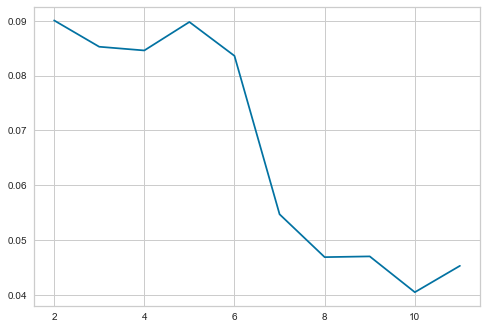

In [71]:
sil=df1
score =[]
for i in range(2,12):
    s=KMeans(i)
    s1=s.fit_predict(sil)    
    score.append(silhouette_score(sil,s1))
    print("The silhouette_score for n= {} ".format(i),silhouette_score(sil,s1).round(4))
plt.plot(range(2,12),score)
plt.xlab=("N-Value")
plt.ylab=("silhouette_score")


On observing graph the max occur at n=4